<img style="float: right;" src="https://nens.lizard.net/media/projecten/lizard_tutorial/lizard_logo.png" width="200"/>

# Getting familiair with Lizard Time Series API V4
Welcome! In this Notebook we will help you get more familiair with time series and their availability through the Lizard Time Series API.
If you have feedback or questions about this Notebook, please do not hesitate to contact us via servicedesk@nelen-schuurmans.nl. 

## Introduction 
Lizard is a cloud-based datawarehouse & analytics platform for data that describes the physical environment. 
The Lizard Time Series server stores time series data, which for example can describe the water level in a river or the energy consumption of a pumping station.
Time series in Lizard are always related to a geographical location (x,y).
In addition time series can be linked to an asset.
More general information surrounding time series in Lizard can be found in the documentation: https://docs.lizard.net/c_timeseries.html

Lizard offers a high-performance, easy to access data source with its API. 
The API can be used to retrieve raw data or for to retrieve aggregated data and statistics.
There is a wide variety of use cases, this notebook will help you get familiar with requesting time series data from the Lizard API.


---



# The Time Series Data Model explained 
The time series data model consists of two main components `time series metadata` and `time series events`. These two components together are referred to as a `time series object`. <br>

Below we explain the metadata and which fields are mandatory, optional or system defined (read only) when uploading and retrieving time series. <br>
### Time Series Metadata
The time series meta data consists of numerous attributes that are explained below. Some are mandatory, some optional and some are created by Lizard.




| **Attribute** | **Example** | **Requirement**| **Format**
|:------|:------|:------|:------|
|   **UUID**  | 744b7703-0423-4f1e-b15d-1b36d9dd8dde |Read only| string(36)
|   **Code**  | NEERSG::second::1::86400 |Mandatory| string(128)
|   **Name**  | NEERSG |Optional| string(64)
|   **Description**  | Timeseries of precipitation |Optional| string, empty string allowed, null allowed
|   **Start**  | 2020-07-02T08:56:36Z |Read only| string in ISO 8601 format
|   **End**  | 2020-08-02T08:56:36Z |Read only| string in ISO 8601 format
|   **Value_type**  | float |Mandatory| "integer" or 0, "float" or 1 "boolean" or 2, "text" or 4, "image" or 5, "movie" or 8, "file" or 10, "float array" or 12
|   **Interval**  | 86400 |Optional| positive integer or 0 (expressed in seconds), null is allowed
|   **Observation_type**  | 441 |Mandatory| integer (foreign key to any of https://demo.lizard.net/api/v4/observationtypes/)
|   **Datasource**  | 6 |Optional| integer (foreign key to any of https://demo.lizard.net/api/v4/datasources/)
|   **Supplier**  | john.doe |Optional| string (recommended to use your own username or the one from your service account)
|   **Supplier_code**  | john_doe_precipitation |Optional| string(256), empty string or null is allowed 
|   **Location**  | 6eb648bf-c5a4-4566-ac7a-1311ec69921c |Mandatory| string(36), create your own location or choose any of https://demo.lizard.net/api/v4/locations/)
|   **Extra_metadata**  | {"bla1": bla1,"bla2": bla2,"bla3": bla3,"bla4":bla4} |Optional| valid JSON, null is NOT allowed
|   **Created**  | 2020-04-02T08:56:36Z |Read only| string in ISO 8601 format
|   **Last_modified**  | 2020-07-02T08:56:36Z |Read only | string in ISO 8601 format

### Time Series Events
Time Series Events, or the actual values per time step, consist of a few attributes. An example is visible below this section.



| **Attribute** | **Example** | **Requirement**| **Format**
|:------|:------|:------|:------|
|   **Time**  | 2020-04-23T00:00:00Z |Mandatory|string in ISO8601 format
|   **Value**  | 1.709 |Optional|number, string or boolean (depends on given value_type attributa in time series object metadata
|   **Flag**  | 5 |Optional|integer
|   **Comment**  | Reliable |Optional|string
|   **Last_modified**  | 2020-04-23T00:00:00Z |Read only|number, string or boolean (depends on given value_type attributa in time series object metadata
|   **Detection_limit**  | < |Optional|<, > or empty string





---



---



# The Lizard API explained

The [Lizard API](https://demo.lizard.net/api/v4/timeseries) is a [RESTful API](https://restfulapi.net/). The API responses will be returned in [JSON format](https://www.json.org/json-en.html). You can use HTTP requests to interact with Lizard using the API. 


### HTTP Methods to use in the Lizard API 
**GET** = use the GET method to retrieve existing time series metadata or time series events from the Lizard API <br>
**POST** = use the POST method to create a time series object and upload a time series and it's metadata <br>
**PUT** = use the PUT method to update time series metadata or time series events of an existing time series object<br>
**PATCH** = use the PATCH method to partially update time series metadata or time series events of an existing time series object <br>
**DELETE** = use the DELETE method to delete and existing time series object, it's metadata and events <br>


#### Response
This is an example of a paginated API response in JSON. The default amount of objects the API returns is 10. You can extend the response size using the `page_size=` query parameter

{
    "count": 9925,
    "next": "https://demo.lizard.net/api/v4/timeseries/e849123b-19eb-43a4-ae16-f3cb05a9dea7/events/?page=2&time__gte=2020-04-23T00%3A00%3A00",
    "previous": null,
    "results": [
        {
            "time": "2020-04-23T00:00:00Z",
            "value": 1.709,
            "flag": 0,
            "validation_code": "",
            "comment": "",
            "last_modified": "2020-04-25T03:58:56.839756Z",
            "detection_limit": ""
        },
        {
            "time": "2020-04-23T00:15:00Z",
            "value": 1.71,
            "flag": 0,
            "validation_code": "",
            "comment": "",
            "last_modified": "2020-04-25T03:58:56.839898Z",
            "detection_limit": ""
        },
        {
            "time": "2020-04-23T00:30:00Z",
            "value": 1.71,
            "flag": 0,
            "validation_code": "",
            "comment": "",
            "last_modified": "2020-04-25T03:58:56.839985Z",
            "detection_limit": ""
        }
        ]
}



---



---



## 0. The Beginning

Now let's start the tutorial. <br>
As discussed, there are multiple ways to interact with the API. In this tutorial we will get to know the GET, POST and PATCH commands. <br>
1. We will begin by using the POST command to create a new time series.
2. Then we will use the PATCH command to update/change the data of the timeseries created in step 1.
3. Finally we will access the data with the GET functionality.

These tools will give you a solid basis to interact with timeseries of the API. <br>
These API commands also work for other objects, like rasters. <br>
Rasters have their own tutorial which can be found [here](https://demo.lizard.net/media/tutorials/Getting_familiair_with_Lizard_Rasters_API.ipynb).

# 1. How to import the right Python dependencies

First we have to make sure the correct packages are installed. In order to use modules in jupyter notebook or python you need a virtual environment with the correct modules installed.
Only once we have created this virtual environment and activated it can we start downloading the correct modules into the environment with conda or pip.
To create a virtual environment:

1.  Open a `cmd` terminal
2.  Switch the directory to a folder where you want to have your virtual environment. You can change directories with the command cd {directory}.
3.  Once in the right directory, type: "py -m venv {virtual environment name}"  -> Example: py -m venv lizard
4.  Activate the venv, type: "{virtual environment name}\Scripts\activate.bat" -> You should now see ({virtual environment name}) before your terminal line.
5.  You can now install all the right modules, for this and the other toturials use the requirements.txt file you can find on the website (link). We will do this with the pip install command.
6.  Type: pip install -r /path/to/requirements.txt -> Example: C:\Users\steven\Downloads\requirements.txt


Once our environment is set up, we can select this as our interpreter in our coding environment.
This allows us to access the modules we just downloaded.
Now we can start with importing the right Python dependencies. 

In [13]:
import os, getpass
import pandas as pd
from pandas.io.json import _normalize as json_normalize
import requests
import csv, json
import datetime
import pickle
import sys
import matplotlib.pyplot as plt

-------------------------------------------------------------------------------------------------------------------------------

# 2. How to authenticate with Lizard
Authenticating to the REST API outside of a browser is done by attaching a Personal API Key to every request. You can attach a Personal API Key to a request by using HTTP Basic Authentication with password = {your api key}. The username needs to be fixed to `__key__` (with two underscores on both sides of the word “key”).

**How to generate an API key in 6 easy steps**
1. Go to your organisations lizard portal https://{organisation}.lizard.net or https://demo.lizard.net
2. Click on `management`
3. Click on `personal api keys`
4. Click on `+ NEW ITEM`
5. Give an easy to remember name to the key and click `save`
6. Copy the key and put it into this file as password.

While you cannot access the key through the management screen anymore if you lose it, you are able to delete the old key and generate a new one.

It is considered best practise to generate one Personal API Key per application or script, so that you can selectively revoke keys in case they are compromised. Learn more about Lizard's authorization and authentication model via https://docs.lizard.net/d_apitechnical.html#


In [14]:
# Authentication
username = '__key__'
password = '...'    # Generate your own API key at the Lizard Management page as practice

json_headers = {
            "username": username,
            "password": password,
            "Content-Type": "application/json",
        }

-------------------------------------------------------------------------------------------------------------------------------

# 3. How to create a time series object and upload time series events using the POST method? 

To upload time series to Lizard we will go through 4 steps, namely: 
    
   1. Making sure the time series data has the right format.
   2. Creating a new location object to link the time series data to.
   3. Creating a time series object and linking it to a location.
   4. Upload the time series events data to your newly created time series object.

**Step 1: Put your time series events data in the right format**

To be able to upload your time series events data to Lizard, the timeseries have to be in a specific data format. 
You can use the python library pandas to modify your time series events data. 
Every time series measurement requires a datetime and a value.
The correct format is as follows:


[{'time': '2019-01-28T15:44:13Z', 'value': 0.000471},<br>
{'time': '2019-01-28T15:45:07Z', 'value': 0.00045}]

In [3]:
# Here is a test time series, feel free to import your own or adjust the data as much as you would like

time_series =   [{'time': '2019-01-27T12:00:00Z', 'value': '0.03'},
                 {'time': '2019-01-28T00:00:00Z', 'value': '0.036'},
                 {'time': '2019-01-28T12:00:00Z', 'value': '0.05'},
                 {'time': '2019-01-29T00:00:00Z', 'value': '0.055'},
                 {'time': '2019-01-29T12:00:00Z', 'value': '0.025'},
                 {'time': '2019-01-30T00:00:00Z', 'value': '0.04'},
                 {'time': '2019-02-01T00:00:00Z', 'value': '0.08'},
                 {'time': '2019-02-03T12:00:00Z', 'value': '0.04'},
                 {'time': '2019-02-06T00:00:00Z', 'value': '0.015'},
                 {'time': '2019-02-29T12:00:00Z', 'value': '0.005'}]

**Step 2: Create a location to relate the time series to a geographical location**

Time series in Lizard are always related to a geographical location as they represent measurements in our physical environment. Therefore, before uploading the time series events data, Lizard has to know where (geographically) the time series were measured. For this purpose you must create a location, this will become visible as one possible location in the locations API page (demo.lizard.net/api/v4/locations). Once we have created this location we can link our time series data to the location to create an actual time series. To create a new location the following API request must be caried out:

**How to find your organisations uuid!**
To be able to access the API here, you need to enter the organisations for which your API key gives acces. You can find your organisations uuid as follows:

1. Use the lizard API to look up your organisation: https://demo.lizard.net/api/v4/organisations/?name__istartswith=
2. After the link you add your organisations name, like Nelen (& Schuurmans) -> https://demo.lizard.net/api/v4/organisations/?name__istartswith=Nelen
3. You will then see a list of organisations with each an: url, uuid and a name. Choose the uuid of the correct organisation and use it in the next code block.


**Data model of a Location**
* **name**: e.g. 'Groundwater station 1'
* **access_modifier**: 0 for public, 1 for common, 2 for private
* **code**: each location has a unique code
* **organisation**: a uuid (universal id) which is connected to the organisation. You can find the uuid's of the organisations here: https://nens.lizard.net/api/v4/organisations/
* **geometry**: the geometry should be a point geometry in geojson format and in the EPSG:4326 projection
* **ddsc_show_on_map**: If set to True, this location is directly shown in Lizard

In [38]:
# Look up the organisation uuid as explained above.
organisation_uuid = '...' # Give the organisation uuid for which you have rights.
location_url = "https://demo.lizard.net/api/v4/locations/"

# Fill in the additional data required!

data = {'name':'...', # Give a name to your location
        'access_modifier':., # Determine what access modifier you want to give the location, supply an integer
        'code':'...', # Give a unique code for your location (can be letters and numbers)
        'organisation': organisation_uuid, 
        'geometry':{
                "type": "Point",
                "coordinates": [
                    4.683839188453384,
                    52.49446759721568,
                    0.0
                ]
            },
          'ddsc_show_on_map':True}

r = requests.post(url=location_url, data=json.dumps(data), headers=json_headers)  

print(r.json())

{'url': 'https://demo.lizard.net/api/v4/locations/297d3978-e02e-4c42-abb4-eb5a342c2ba6/', 'uuid': '297d3978-e02e-4c42-abb4-eb5a342c2ba6', 'name': 'Tutorial API Steven', 'code': 'Sv5_API', 'geometry': {'type': 'Point', 'coordinates': [4.683839188453384, 52.49446759721568, 0.0]}, 'organisation': {'url': 'https://demo.lizard.net/api/v4/organisations/61f5a464-c350-44c1-9bc7-d4b42d7f58cb/', 'uuid': '61f5a464-c350-44c1-9bc7-d4b42d7f58cb', 'name': 'Nelen & Schuurmans Consultancy'}, 'object': None, 'access_modifier': 'Public', 'extra_metadata': {}, 'created': '2023-09-18T14:49:31.762659Z', 'last_modified': '2023-09-18T14:49:31.762644Z', 'last_modified_by': 'steven.hosper@nelen-schuurmans.nl'}


We have now created a new location, the uuid will be unique for every newly generated location. The output of the codeblock will give you all relevant information.
If you somehow lost the information, you can lookup your location in the sameway as the organisations uuid. <br>

https://demo.lizard.net/api/v4/locations/?name__startswith={the_name_you_used}

In [16]:
location_uuid = ''

**Step 3: Create a time series object and relate it to a location**
    
The next step is to create a new time series object. This new object has to be connected to the location created above. We give the following arguments to the api request:
* **name**: "groundwater head" -> can help you find your time series later
* **access_modifier**: 0 for public, 1 for common, 2 for private -> determines who has access to your time series
* **code**: "groundwater_head_v1" -> has to be unique
* **supplier**: choose your username
* **location**: give the locations uuid (or the on you just generated)
* **value_type**: 1, can be can be: "integer" or 0 | "float" or 1 | "boolean" or 2 | "text" or 4 | "image" or 5 | "movie" or 8 | "file" or 10 | "float array" or 12 |
* **observation_type**: 845 (for hydraulic head). Other observation types can be found here: https://demo.lizard.net/api/v4/observationtypes/.

In [39]:
timeseries_url = "https://demo.lizard.net/api/v4/timeseries/"

# In this example we will use the observation type 'hydraulic head'
observation_code = ... # Give the code for hydraulic head

data = {'name':'', # Give a name to your location
        'access_modifier':, # Determine what access modifier you want to give the location, supply an integer
        'code':'', # Give a unique code for your location (can be letters and numbers)
        'location': location_uuid, 
        'value_type':1,
        'observation_type': observation_code,
        'timeseries_type':None}   

r = requests.post(url=timeseries_url, 
                  data=json.dumps(data), 
                  headers=json_headers)

print(r.json())

{'url': 'https://demo.lizard.net/api/v4/timeseries/17aaeda6-4402-419e-8dc8-36c155833250/', 'uuid': '17aaeda6-4402-419e-8dc8-36c155833250', 'code': 'GWH_Tut_v2', 'name': 'Tutorial_GWH', 'description': '', 'start': None, 'end': None, 'value_type': 'float', 'last_value': None, 'interval': 0, 'observation_type': {'url': 'https://demo.lizard.net/api/v4/observationtypes/845/', 'id': 845, 'code': 'Elevation(mMSL)', 'parameter': 'Elevation', 'unit': 'm', 'scale': 'interval', 'description': '', 'domain_values': None, 'reference_frame': 'MSL', 'compartment': '', 'created': '2017-08-21T12:22:55.356966Z', 'last_modified': '2019-06-25T07:26:10.441021Z'}, 'datasource': None, 'supplier': 'steven.hosper@nelen-schuurmans.nl', 'supplier_code': None, 'location': {'url': 'https://demo.lizard.net/api/v4/locations/0c711f38-f53d-41f0-9393-d75a18099dd7/', 'uuid': '0c711f38-f53d-41f0-9393-d75a18099dd7', 'name': 'Tutorial API Steven', 'code': 'Sv4_API'}, 'extra_metadata': {}, 'created': '2023-09-18T14:49:44.628

**Step 4: Upload the time series events data to your newly created time series object**

In step 3 we have created a new timeseries in Lizard. This time series object now has a UUID. We now use this UUID to upload the data to the Lizard Time Series Server.

In [43]:
timeseries_uuid = '...' # Supply the uuid of the timeseries you have created.

data_url = timeseries_url + timeseries_uuid + '/events/'
        
r = requests.post(url=data_url,
                   data=json.dumps(time_series),
                   headers=json_headers)  

-------------------------------------------------------------------------------------------------------------------------------

# 4. How to create/update values and metadata of a time series object using the POST method

**Step 1: Import the timeseries events of which the metadata or values should be adjusted**

We are accessing our time series with the use of a `GET` request.
Once we have the data, we can adjust it and then return it to the server.

In [44]:
# We can re-use the data_url from the prior code block, this time we will request the data with the `GET` functionality
res = requests.get(data_url,headers=json_headers).json()['results']

# Convert the response to a printable dataframe 
events =  pd.DataFrame(res)
events.index = pd.to_datetime(events['time'])
print(events[0:5])


                                           time  value  flag validation_code  \
time                                                                           
2019-01-27 12:00:00+00:00  2019-01-27T12:00:00Z  0.030   100                   
2019-01-28 00:00:00+00:00  2019-01-28T00:00:00Z  0.036   100                   
2019-01-28 12:00:00+00:00  2019-01-28T12:00:00Z  0.050   100                   
2019-01-29 00:00:00+00:00  2019-01-29T00:00:00Z  0.055   100                   

                                              comment  \
time                                                    
2019-01-27 12:00:00+00:00  This is the first comment!   
2019-01-28 00:00:00+00:00  This is a test timeseries!   
2019-01-28 12:00:00+00:00  This is a test timeseries!   
2019-01-29 00:00:00+00:00  This is a test timeseries!   

                                         last_modified detection_limit  
time                                                                    
2019-01-27 12:00:00+00:00  202

**Step 2: Adjust the values and metadata of the timeseries events**

The following attributes can be set (depending on the value type).<br>

Depending on the value_type of the corresponding time series, the following fields may be set:
* `time`: ISO 8601 date and time representation. This is a required field.

* `value`: A number, string, or boolean, depending on the value_type of the corresponding time series. Nullable for numbers. Since float is the most commonly used value_type, numbers are predominant.

* `flag`: A small integer. Nullable. Not available for booleans.

* `validation_code`: A string of at most 3 characters. Available for numbers and booleans.

* `comment`: A string. Available for numbers and booleans.

* `detection_limit`: Either "", "<", or ">". Only available for numbers.


In [46]:
# Copy the table to work with it in a new variable
events_edit = events.copy()
events_edit['flag'] = '100' # Insert new value
events_edit['comment'] = "This is a test timeseries!" # Insert new value
events_edit=events_edit[['time','value','flag','comment']]

# To change a single value, use the 'iat' functionality within pandas
# The first number is the row, the second is the column.
events_edit.iat[0,3] = "This is the first comment!"

print(events_edit)

                                           time  value flag  \
time                                                          
2019-01-27 12:00:00+00:00  2019-01-27T12:00:00Z  0.030  100   
2019-01-28 00:00:00+00:00  2019-01-28T00:00:00Z  0.036  100   
2019-01-28 12:00:00+00:00  2019-01-28T12:00:00Z  0.050  100   
2019-01-29 00:00:00+00:00  2019-01-29T00:00:00Z  0.055  100   

                                              comment  
time                                                   
2019-01-27 12:00:00+00:00  This is the first comment!  
2019-01-28 00:00:00+00:00  This is a test timeseries!  
2019-01-28 12:00:00+00:00  This is a test timeseries!  
2019-01-29 00:00:00+00:00  This is a test timeseries!  


**Step 3: Submit the changes to the lizard api by means of a POST request** <br>
While normally patching is used to change values with the API, for the time series events page PATCH is not allowed. You can inspect what functionality is allowed at the upper section of every API. In the next block of code we will: <br>

1. Convert our data back to a json file.
2. Use a `POST` request to send the data to the API.
3. Use a `GET` request to retrieve the updated data.
4. Check if the data has been updated with a print statement.

In [47]:
# Convert data to json
dataupload = eval(events_edit[['time','value','flag','comment']].to_json(orient='records'))

# Send the 'post' request
res = requests.post(url=data_url,
                    data=json.dumps(dataupload),
                    headers=json_headers)

# Send the 'get' request
res = requests.get(data_url,headers=json_headers).json()['results']

# Inspect the results
updated_table =  pd.DataFrame(res)
updated_table.index = pd.to_datetime(updated_table['time'])
print(updated_table[0:5])

                                           time  value  flag validation_code  \
time                                                                           
2019-01-27 12:00:00+00:00  2019-01-27T12:00:00Z  0.030   100                   
2019-01-28 00:00:00+00:00  2019-01-28T00:00:00Z  0.036   100                   
2019-01-28 12:00:00+00:00  2019-01-28T12:00:00Z  0.050   100                   
2019-01-29 00:00:00+00:00  2019-01-29T00:00:00Z  0.055   100                   

                                              comment  \
time                                                    
2019-01-27 12:00:00+00:00  This is the first comment!   
2019-01-28 00:00:00+00:00  This is a test timeseries!   
2019-01-28 12:00:00+00:00  This is a test timeseries!   
2019-01-29 00:00:00+00:00  This is a test timeseries!   

                                         last_modified detection_limit  
time                                                                    
2019-01-27 12:00:00+00:00  202

------------------------------------------------------------------------------------------------------------------------------------------------------------------


# 5. How to delete a single event from a time series using the DELETE method?

For deleting it is important you are using the right URL, you do not want to delete data you need later. <br>
Apart from that, it is relatively straightforward. For a time series we can use the datetime to select the event we want to delete. Use one of the dates (like 2019-01-29T12:00:00Z in the example) as date variable.

In [48]:
date = '2019-01-29T12:00:00Z'
url = 'https://demo.lizard.net/api/v4/timeseries/{}/events/{}/'.format(timeseries_uuid, date)
res = requests.delete(url=url,
                       headers=json_headers)

-------------------------------------------------------------------------------------------------------------------------------

# 6. How to query a list of time series objects? 

At this point we have already done this multiple times to access and edit the data. But lets take a different timeseries and inspect it. <br>
Go to https://demo.lizard.net/api/v4/timeseries/ and find yourself a new timeseries to inspect. Pick anyone.

In [49]:
# Remember that the time series information is found in the .../timeseries/{uuid}/events/ page.
new_uuid = '...' # place the uuid of the new timeseries of interest here.
new_timeseries_events_url = 'https://demo.lizard.net/api/v4/timeseries/{}/events/'.format(new_uuid)

# Retrieve the 'results' attribute using a JSON interpreter
data = requests.get(new_timeseries_events_url,headers=json_headers)

# Read the first 5 results of the json() file into the pandas dataframe.
print(pd.DataFrame(data.json()['results'][0:5]))


                   time  value  flag validation_code comment  \
0  2010-01-01T00:00:00Z -0.866     1                           
1  2010-01-01T00:15:00Z -0.863     1                           
2  2010-01-01T00:30:00Z -0.861     1                           
3  2010-01-01T00:45:00Z -0.859     1                           
4  2010-01-01T01:00:00Z -0.855     1                           

                 last_modified detection_limit  
0  2020-04-14T08:48:27.317083Z                  
1  2020-04-14T08:48:27.317083Z                  
2  2020-04-14T08:48:27.317083Z                  
3  2020-04-14T08:48:27.317083Z                  
4  2020-04-14T08:48:27.317083Z                  


-------------------------------------------------------------------------------------------------------------------------------

# 7. How to filter time series objects by metadata attributes? 

### Available query parameters
To filter time series objects by metadata attributes you can use the following query parameters:

`?name={name}` -> use the exact `name` to find your time series.

`?name__startswith={name_start}` -> only requires the start of the name. <br><br>

Like this there are many possible ways to look for time series. Some more examples are:

`?code=abc&location__uuid=b10eaf1f-2867-4ffb-8f4a-5eb9bd37dbf1`

`?code__startswith=a&location__uuid=b10eaf1f-2867-4ffb-8f4a-5eb9bd37dbf1`

`?value_type=float`

`?observation_type=1`

`?observation_type__id=1`

`?observation_type__code=my-code`

`?observation_type__code__startswith=my-c`

`?datasource=1`

`?datasource__id=1`

`?datasource__uuid=b10eaf1f-2867-4ffb-8f4a-5eb9bd37dbf1`

`?location__uuid=b10eaf1f-2867-4ffb-8f4a-5eb9bd37dbf1`

`?location__organisation__uuid=b10eaf1f-2867-4ffb-8f4a-5eb9bd37dbf1`

## How to filter time series objects by their name? 

In [1]:
#Call the Lizard API V4 Time series endpoint & add ?name_startswith="N"
url = "https://demo.lizard.net/api/v4/timeseries/"
params= {'name__startswith':'N'}

#Retrieve the 'results' attribute using a JSON interpreter
timeseries_list = pd.DataFrame(requests.get(url,headers=json_headers, params=params).json()['results'])
timeseries_list[0:4] # print only the first 5 rows of the dataframe

NameError: name 'pd' is not defined

-------------------------------------------------------------------------------------------------------------------------------

## Monitoring Networks
Monitoring networks allow you to group time series based on self-defined characteristics, e.g. by monitoring goal (surface water or weather) or observation type (water level, flow, temperature). Time series that are grouped by a monitoring network are listed in Lizard Catalogue where users can easily find the time series their interested in and open them in Lizard Portal or the API (https://demo.lizard.net/catalogue or https://[yourportal].lizard.net/catalogue). <br>

One example of a monitoring network is the KNMI weatherstations group. These are different locations with individual measurements, but with similar attributes.

<img style="float: left;" src="https://docs.lizard.net/_images/e_catalog_10.png" width="1000"/>






### 1. How to create a monitoring network


To create a monitoring network, the following variables should be defined:

In [53]:
name = '...' # Give a name to your monitoring network

# For the organisation_uuid -> Use the one used prior or find it via https://demo.lizard.net/api/v4/organisations/?name__icontains=

acces_modifier = '.' # 0=public (Everyone can see this), 
                     # 1=common (logged-in users can see this), 
                     # 2=private (logged-in users with user rights to your organisation can see this), 
                     # 3=hidden (only admins of your organisatio can see this)
description = 'This is a description of ...' # Description

After defining the variables, store them in a json string and perform a post request:

In [54]:
# Add our individual elements into a data dictionary
data = {'name': name,
        'organisation': organisation_uuid,
        'access_modifier': acces_modifier,
        'description': description
        }

url = 'https://demo.lizard.net/api/v4/monitoringnetworks/'

# Since we are creating a new monitoring network we are using the POST functionality again.
res = requests.post(url = url,
                    data = json.dumps(data),
                    headers = json_headers)

# get the information of the monitoring from the request response:
response = res.json()
print(response)

{'url': 'https://demo.lizard.net/api/v4/monitoringnetworks/58c63b59-fbfd-499e-a785-afc84a85193d/', 'uuid': '58c63b59-fbfd-499e-a785-afc84a85193d', 'name': 'MyMonitoringNetwork1', 'organisation': {'url': 'https://demo.lizard.net/api/v4/organisations/61f5a464-c350-44c1-9bc7-d4b42d7f58cb/', 'uuid': '61f5a464-c350-44c1-9bc7-d4b42d7f58cb', 'name': 'Nelen & Schuurmans Consultancy'}, 'access_modifier': 'Public', 'num_timeseries': 0, 'description': 'This is a description of MyMonitoringNetwork', 'created': '2023-09-18T14:51:40.348939Z', 'last_modified': '2023-09-18T14:51:40.348923Z'}


Now, the created monitoringnetwork can be found in the catalogue under the given organisation

### 2. How to add (multiple) timeseries to a monitoring network

We can use the uuid's of individual time series to add them to a monitoring network. <br>
This can be effectively done by adding all uuids of the time series of interest in a list, an example can be found below:

In [55]:
# We currently use the timeseries_uuid created, and the additional one we used for the second test.
ts_list = [timeseries_uuid, new_uuid]

# You can add more uuids if you want to.

Add the time series to the monitoring network with:

In [56]:
# If you lost the monitoring network uuid, you can find it with a `get` request
url = "https://demo.lizard.net/api/v4/monitoringnetworks/"
params= {'name__startswith':'...'} # Find your monitoring netweork with the beginning of the name -> case sensitive!

#Retrieve the 'results' attribute using a JSON interpreter
timeseries_list = pd.DataFrame(requests.get(url,headers=json_headers, params=params).json()['results'])
timeseries_list[0:5] # print only the first 5 rows of the dataframe


url  \
0  https://demo.lizard.net/api/v4/monitoringnetwo...   

                                   uuid                  name  \
0  58c63b59-fbfd-499e-a785-afc84a85193d  MyMonitoringNetwork1   

                                        organisation access_modifier  \
0  {'url': 'https://demo.lizard.net/api/v4/organi...          Public   

   num_timeseries                                   description  \
0               0  This is a description of MyMonitoringNetwork   

                       created                last_modified  
0  2023-09-18T14:51:40.348939Z  2023-09-18T14:51:40.348923Z

In [59]:
# Use your monitoringnetwork uuid to add (post) the list of time series to the network.
monitoring_network_uuid = '...' # Read the monitoring network uuid from the prior code-block result
url = 'https://demo.lizard.net/api/v4/monitoringnetworks/{}/timeseries/'.format(monitoring_network_uuid)
res = requests.post(url = url, data = json.dumps(ts_list), headers = json_headers)

To get an overview of the time series in the monitoring network, perform a  `GET` request on the time series endpoint:

In [60]:
# Request the data from the monitoring network
res = requests.get(url = url, headers = json_headers).json()

# Store the results of the response in a dataframe
network = pd.DataFrame(res['results'])

# Check the first timeseries of the network
print(network.iloc[0])

url                 https://demo.lizard.net/api/v4/timeseries/1bcb...
uuid                             1bcba36e-781d-4339-9632-00d5398c3b15
code                                         H.meting::second::1::900
name                                                         H.meting
description                                                          
start                                            2010-01-01T00:00:00Z
end                                              2016-08-16T11:30:00Z
value_type                                                      float
last_value                                                        NaN
interval                                                          900
observation_type    {'url': 'https://demo.lizard.net/api/v4/observ...
datasource                                                       None
supplier                                                         None
supplier_code                                                    None
location            

**Accessing individual time series from the monitoring network is easy.** <br>
<br>
The related locations are listed in the locations column of the network dataframe:

In [61]:
# See the location header, you might have to scroll right

network.head()

url  \
0  https://demo.lizard.net/api/v4/timeseries/1bcb...   
1  https://demo.lizard.net/api/v4/timeseries/940b...   

                                   uuid                      code  \
0  1bcba36e-781d-4339-9632-00d5398c3b15  H.meting::second::1::900   
1  940b1ce7-3d03-4105-a427-e284b04fbdf5                GWH_Tut_v1   

           name description                 start                   end  \
0      H.meting              2010-01-01T00:00:00Z  2016-08-16T11:30:00Z   
1  Tutorial_GWH              2019-01-27T12:00:00Z  2019-01-29T00:00:00Z   

  value_type  last_value  interval  \
0      float         NaN       900   
1      float       0.055         0   

                                    observation_type datasource  \
0  {'url': 'https://demo.lizard.net/api/v4/observ...       None   
1  {'url': 'https://demo.lizard.net/api/v4/observ...       None   

                            supplier supplier_code  \
0                               None          None   
1  steven.hosper@nelen-schuurmans.nl          None   

                                            location extra_metadata  \
0  {'url': 'https://demo.lizard.net/api/v4/locati...             {}   
1  {'url': 'https://demo.lizard.net/api/v4/locati...             {}   

                       created                last_modified access_modifier  
0  2014-11-05T10:25:31.597427Z                         None          Public  
1  2023-09-11T14:55:52.664395Z  2023-09-18T14:45:23.229661Z          Public

In [62]:
# We can find the location endpoints as followed
network.location[1] # Note that this gives the second location as indexing starts at 0

{'url': 'https://demo.lizard.net/api/v4/locations/0c711f38-f53d-41f0-9393-d75a18099dd7/',
 'uuid': '0c711f38-f53d-41f0-9393-d75a18099dd7',
 'name': 'Tutorial API Steven',
 'code': 'Sv4_API'}

This way it is easy to find most of the relevant information to access the time series of interest.

#### 3. Delete timeseries from a monitoringnetwork

Just as easy as we can add a time series to the monitoring network we can remove one. <br>
To do this a `DELETE` request is send to the timeseries endpoint of the monitoringnetwork:

In [63]:
# Show the timeseries available within the network
print('Timeseries in monitoringnetwork:') 
url = 'https://demo.lizard.net/api/v4/monitoringnetworks/{}/timeseries/'.format(monitoring_network_uuid)
timeseries = pd.DataFrame(requests.get(url = url, headers = json_headers).json()['results'])
timeseries.head()

# Removing the first time series
delete_timeseries_uuid = [timeseries['uuid'][0]]
print("The ID that will be deleted: ", delete_timeseries_uuid)

Timeseries in monitoringnetwork:
The ID that will be deleted:  ['1bcba36e-781d-4339-9632-00d5398c3b15']


In [64]:
# Delete the timeseries and check
res = requests.delete(url=url, data = json.dumps(delete_timeseries_uuid), headers = json_headers)

res = requests.get(url=url, headers=json_headers)
network = pd.DataFrame(res.json()['results'])
network.head()

url  \
0  https://demo.lizard.net/api/v4/timeseries/940b...   

                                   uuid        code          name description  \
0  940b1ce7-3d03-4105-a427-e284b04fbdf5  GWH_Tut_v1  Tutorial_GWH               

                  start                   end value_type  last_value  \
0  2019-01-27T12:00:00Z  2019-01-29T00:00:00Z      float       0.055   

   interval                                   observation_type datasource  \
0         0  {'url': 'https://demo.lizard.net/api/v4/observ...       None   

                            supplier supplier_code  \
0  steven.hosper@nelen-schuurmans.nl          None   

                                            location extra_metadata  \
0  {'url': 'https://demo.lizard.net/api/v4/locati...             {}   

                       created                last_modified access_modifier  
0  2023-09-11T14:55:52.664395Z  2023-09-18T14:45:23.229661Z          Public

In [65]:
# Lets re-add the timeseries so we can remove it based on the location
res = requests.post(url = url, data = json.dumps(ts_list), headers = json_headers)

res = requests.get(url=url, headers=json_headers)
network = pd.DataFrame(res.json()['results'])
network.head()

url  \
0  https://demo.lizard.net/api/v4/timeseries/1bcb...   
1  https://demo.lizard.net/api/v4/timeseries/940b...   

                                   uuid                      code  \
0  1bcba36e-781d-4339-9632-00d5398c3b15  H.meting::second::1::900   
1  940b1ce7-3d03-4105-a427-e284b04fbdf5                GWH_Tut_v1   

           name description                 start                   end  \
0      H.meting              2010-01-01T00:00:00Z  2016-08-16T11:30:00Z   
1  Tutorial_GWH              2019-01-27T12:00:00Z  2019-01-29T00:00:00Z   

  value_type  last_value  interval  \
0      float         NaN       900   
1      float       0.055         0   

                                    observation_type datasource  \
0  {'url': 'https://demo.lizard.net/api/v4/observ...       None   
1  {'url': 'https://demo.lizard.net/api/v4/observ...       None   

                            supplier supplier_code  \
0                               None          None   
1  steven.hosper@nelen-schuurmans.nl          None   

                                            location extra_metadata  \
0  {'url': 'https://demo.lizard.net/api/v4/locati...             {}   
1  {'url': 'https://demo.lizard.net/api/v4/locati...             {}   

                       created                last_modified access_modifier  
0  2014-11-05T10:25:31.597427Z                         None          Public  
1  2023-09-11T14:55:52.664395Z  2023-09-18T14:45:23.229661Z          Public

### 4. Deleting monitoringnetworks

You might want to remove a redundant or old monitoringnetwork. This can be done as followed:

In [ ]:
url = 'https://demo.lizard.net/api/v4/monitoringnetworks/{}'.format(monitoring_network_uuid)
res = requests.delete(url=url, headers = json_headers)

## 8. How to query raw time series events?

The data of a time series can be queried via the time series `events` endpoint.<br>
You will need the UUID of the time series object that can be found in the list of time series objects (see 6 and 7).
**demo.lizard.net/api/v4/timeseries/**{uuid of time series object}**/events/**

**Example**: https://demo.lizard.net/api/v4/timeseries/8c3bffcf-b0b7-4550-a5a9-c5220c29fede/events/

We're going to query the precipitation time series of weather station "De Bilt" in The Netherlands, the example URL can be used for this.<br>
If you have a different timeseries of interest feel free to use that one. <br> 
Just replace the uuid of the example with the one of your choice.

### How to query time series events within a specific time frame

Lets say we want to create a plot of the precipitation rate at the "De Bilt" weatherstation.<br>
In order to be able to plot the data we need to do a few things:<br>
1. Determine what information we want to ask of the API. This will determine the parameter settings.
2. Retrieve the information with a `GET` request.
3. Place the response inside a dataframe.
4. Use the dataframe to build a plot.

**Available query parameters**<br>
If we want to specify the period of the timeseries we can use the `start` and `end` params. These use the ISO 8601 format: YYYY-MM-DDThh:mm:ssZ. With the T and Z being actual letters and the other letters resembling a measure of time:<br>
* YYYY = Year -> Ex: 2023
* MM = Month -> Ex: March = 03
* DD = Day -> Ex: 5th day = 05
* hh = Hours 
* mm = Minute
* ss = second

To determine the fields we want to get from the API we use the `fields` parameter. In our example we are interested in the value field.

The final parameter we will use is the `page_size`. This determines the number of items returned on one page and it is important because only one page of data is returned. This means that if a timeseries has thousands of results, and we are interested in all values, we have to either iterate through all the pages or make the page very large.

All of the available parameters can be found on the website of the API:<br>
General timeseries API parameters: https://demo.lizard.net/api/v4/timeseries/ <br>
Event timeseries API parameters: https://demo.lizard.net/api/v4/timeseries/8c3bffcf-b0b7-4550-a5a9-c5220c29fede/events <br> 
There are also examples available. We will just show some use cases in the next code blocks.

In [66]:
#Find the uuid of the timeseries you want to query
uuid = "8c3bffcf-b0b7-4550-a5a9-c5220c29fede"
# we're going to query request the data of the year 2010 to 2023 (the first of january for both)
# Fill in the start and end values with the ISO 8601 notations: YYYY-MM-DDThh:mm:ssZ
params= {'start':'', 'end':'', 'page_size':'100'} # Note that we use a page size of 100.
url = "https://demo.lizard.net/api/v4/timeseries/{}/events/".format(uuid)    

#Retrieve the 'results' attribute of the response using a JSON interpreter
time_series_events = pd.DataFrame(requests.get(url = url, headers = json_headers, params = params).json()['results'])
time_series_events

time  value  flag validation_code comment  \
0   2010-01-01T00:00:00Z    0.0  None                           
1   2010-01-01T01:00:00Z    0.0  None                           
2   2010-01-01T02:00:00Z   -0.1  None                           
3   2010-01-01T03:00:00Z   -0.1  None                           
4   2010-01-01T04:00:00Z   -0.1  None                           
..                   ...    ...   ...             ...     ...   
95  2010-01-04T23:00:00Z    0.0  None                           
96  2010-01-05T00:00:00Z   -0.1  None                           
97  2010-01-05T01:00:00Z   -0.1  None                           
98  2010-01-05T02:00:00Z    0.8  None                           
99  2010-01-05T03:00:00Z    0.1  None                           

                  last_modified detection_limit  
0   2020-11-19T15:37:28.591409Z                  
1   2020-11-19T15:37:28.591452Z                  
2   2020-11-19T15:37:28.591494Z                  
3   2020-11-19T15:37:28.591537Z                  
4   2020-11-19T15:37:28.591579Z                  
..                          ...             ...  
95  2020-11-19T15:37:28.595528Z                  
96  2020-11-19T15:37:28.595570Z                  
97  2020-11-19T15:37:28.595612Z                  
98  2020-11-19T15:37:28.595655Z                  
99  2020-11-19T15:37:28.595697Z                  

[100 rows x 7 columns]

C:\Users\steven.hosper\AppData\Local\Temp\ipykernel_8032\655282814.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Axes: xlabel='time'>

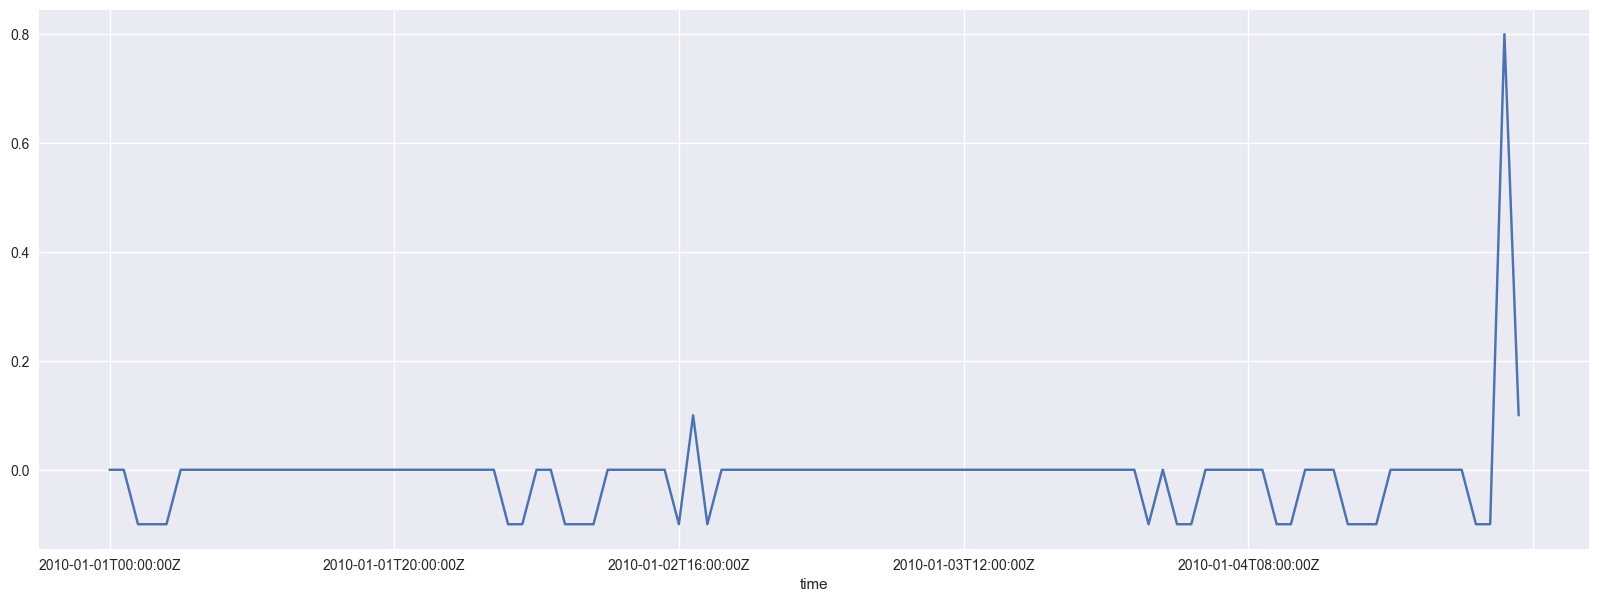

In [67]:
# Convert the data to a plot.
plt.style.use('seaborn')
time_series_events.set_index('time', inplace=True)
time_series_events['value'].plot(figsize=(20,7))

# Note that these plots can be edited in style with the use of all matplotlib styling tools.

### How to query time series events based on their value
In this example we will use the parameters related to the `value`, the available ones are:
* A plain equal (`=`)

Or relational statements like:

* 'greater than or equal' (`gte`)
* 'greater then' (`gt`)
* 'lower than or equal' (`lte`)
* 'lower than' (`lt`). 

#### Examples

Return all events where the value is greater than or equal to 0.05 and lower than 0.175 <br>
`?value__gte=0.05&value__lt=0.175` <br>

Return all events where the value is exactly 0.578 <br>
`?value=0.578`<br>

### Querying extreme rainfall events from the "De Bilt" weatherstation
If we would be interested in the extreme rainfall events surrounding the De Bilt weatherstation we could look for great precipitation rates.<br>
1. For the first step we will query all events with a precipitation rate above 25 (mm)
2. Secondly we will limit the timeperiod to the last 10 years with the `start` and `end` params

In [168]:
## STEP 1: QUERYING RAINFALL ABOVE 25MM

# We can use the same uuid and URL as the last exercise. Therefore we only have to adjust the parameters.

# We are interested in the extreme rainfall events above 25 mm.
params= {'value__gte':'...', 'page_size':'...'} # Give a gte value and a page_size value 

#Retrieve the 'results' attribute of the response using a JSON interpreter
time_series_events_above_reference_value = pd.DataFrame(requests.get(url=url,headers=json_headers, params=params).json()['results'])

# Inspect the results
time_series_events_above_reference_value

time  value  flag validation_code comment  \
0  1994-07-31T21:00:00Z   31.0  None                           
1  1995-05-25T19:00:00Z   28.0  None                           
2  1997-08-25T00:00:00Z   31.0  None                           
3  2005-07-30T01:00:00Z   29.6  None                           
4  2011-07-12T21:00:00Z   27.5  None                           
5  2014-04-24T16:00:00Z   25.1  None                           
6  2014-07-28T11:00:00Z   28.2  None                           
7  2016-06-23T02:00:00Z   33.3  None                           
8  2022-08-17T20:00:00Z   32.6  None                           

                 last_modified detection_limit  
0  2020-11-19T15:37:22.239739Z                  
1  2020-11-19T15:37:22.575288Z                  
2  2020-11-19T15:37:23.488556Z                  
3  2020-11-19T15:37:26.856003Z                  
4  2020-11-19T15:37:29.187602Z                  
5  2020-11-19T15:37:30.629114Z                  
6  2020-11-19T15:37:30.759565Z                  
7  2020-11-19T15:37:31.785508Z                  
8  2022-08-20T13:02:21.112934Z

In [2]:
## STEP 2: LIMITING THE TIMESPAN TO THE PAST 10 YEARS

# We just have to adjust the parameters, the URL can remain the same as we are querying from the same timeseries.
# Now combine the knowledge of implementing timeperiods and values to look for all values higher than 27.5 between 2013 and 2023.
# Remember times have to be in ISO 8601 format YYYY-MM-DDThh:mm:ssZ
params= {'start': '...', 'end': '...', 'value__gte':'...', 'page_size':'...'}

#Retrieve the 'results' attribute of the response using a JSON interpreter
time_series_events_above_reference_value = pd.DataFrame(requests.get(url=url,headers=json_headers, params=params).json()['results'])

# Inspect the results
time_series_events_above_reference_value

NameError: name 'pd' is not defined

### How to query time series events with a specific flag? 
You can retrieve time series events that have been assigned a specific flag. The flag can be used to indicate the validation status of a specific event.  

#### Available query parameters
You can use the following query parameters to query for events with a specific flag: 

`?flag=5`

`?flag__gte=5` <br>
gt, gte, lt, lte

`?flag__in=5,6,7`

In [120]:
# we're going to query request the data with the flag tag 0, 2 and 8
# Try all three and see the difference
params= {'page_size':'100', 'flag':'...'}   

#Retrieve the 'results' attribute of the response using a JSON interpreter
time_series_events_with_flag = pd.DataFrame(requests.get(url=url,headers=json_headers, params=params).json()['results'])


time_series_events_with_flag



time  value  flag validation_code comment  \
0   2020-10-23T08:00:00Z    0.0     0                           
1   2020-10-23T09:00:00Z    0.0     0                           
2   2020-10-23T16:00:00Z    0.0     0                           
3   2020-10-23T20:00:00Z    0.0     0                           
4   2020-10-23T21:00:00Z    0.0     0                           
..                   ...    ...   ...             ...     ...   
95  2020-11-02T12:00:00Z    0.3     0                           
96  2020-11-02T13:00:00Z    1.0     0                           
97  2020-11-02T14:00:00Z    0.6     0                           
98  2020-11-03T15:00:00Z    0.3     0                           
99  2020-11-03T16:00:00Z    0.0     0                           

                  last_modified detection_limit  
0   2020-11-20T09:08:48.794646Z                  
1   2020-11-20T10:08:45.185995Z                  
2   2020-11-20T17:08:42.912430Z                  
3   2020-11-20T21:08:38.117560Z                  
4   2020-11-20T22:08:42.801041Z                  
..                          ...             ...  
95  2020-11-30T12:22:26.782527Z                  
96  2020-11-30T13:22:31.452887Z                  
97  2020-11-30T14:22:25.609935Z                  
98  2020-12-01T15:22:29.645369Z                  
99  2020-12-01T16:22:23.654392Z                  

[100 rows x 7 columns]

In [121]:
# Some flags might have all zero's (2), some might have no values at all (8), and others might have some zero's or different values (0).
# Check it out, you might have to load the data with the `GET` request above.
non_zero_df = time_series_events_with_flag[time_series_events_with_flag['value'] > 0]
non_zero_df

time  value  flag validation_code comment  \
12  2020-10-25T05:00:00Z    1.8     0                           
13  2020-10-25T06:00:00Z    2.0     0                           
14  2020-10-25T07:00:00Z    0.3     0                           
25  2020-10-27T21:00:00Z    0.6     0                           
26  2020-10-27T22:00:00Z    0.6     0                           
27  2020-10-27T23:00:00Z    0.4     0                           
30  2020-10-28T05:00:00Z    1.5     0                           
32  2020-10-28T11:00:00Z    0.4     0                           
33  2020-10-28T12:00:00Z    0.2     0                           
34  2020-10-28T13:00:00Z    0.8     0                           
36  2020-10-28T15:00:00Z    0.7     0                           
37  2020-10-28T16:00:00Z    2.1     0                           
38  2020-10-28T17:00:00Z    2.7     0                           
39  2020-10-28T18:00:00Z    0.3     0                           
40  2020-10-28T19:00:00Z    0.1     0                           
42  2020-10-28T21:00:00Z    0.3     0                           
43  2020-10-28T22:00:00Z    0.3     0                           
45  2020-10-29T00:00:00Z    2.2     0                           
46  2020-10-29T01:00:00Z    0.2     0                           
51  2020-10-29T14:00:00Z    0.2     0                           
52  2020-10-29T15:00:00Z    0.7     0                           
53  2020-10-29T16:00:00Z    0.7     0                           
54  2020-10-29T17:00:00Z    1.3     0                           
55  2020-10-29T18:00:00Z    1.4     0                           
56  2020-10-29T19:00:00Z    1.6     0                           
57  2020-10-29T20:00:00Z    1.2     0                           
58  2020-10-29T21:00:00Z    0.3     0                           
65  2020-10-30T14:00:00Z    0.1     0                           
66  2020-10-30T15:00:00Z    0.6     0                           
67  2020-10-30T16:00:00Z    0.9     0                           
68  2020-10-30T17:00:00Z    0.2     0                           
69  2020-10-30T18:00:00Z    0.1     0                           
70  2020-10-30T19:00:00Z    0.2     0                           
71  2020-10-30T20:00:00Z    0.5     0                           
77  2020-10-31T17:00:00Z    1.3     0                           
78  2020-10-31T18:00:00Z    0.8     0                           
79  2020-10-31T19:00:00Z    0.4     0                           
80  2020-10-31T20:00:00Z    0.2     0                           
87  2020-11-01T19:00:00Z    0.9     0                           
88  2020-11-01T20:00:00Z    1.0     0                           
90  2020-11-01T23:00:00Z    1.0     0                           
91  2020-11-02T00:00:00Z    0.9     0                           
94  2020-11-02T03:00:00Z    0.1     0                           
95  2020-11-02T12:00:00Z    0.3     0                           
96  2020-11-02T13:00:00Z    1.0     0                           
97  2020-11-02T14:00:00Z    0.6     0                           
98  2020-11-03T15:00:00Z    0.3     0                           

                  last_modified detection_limit  
12  2020-11-22T06:08:41.509844Z                  
13  2020-11-22T07:08:41.353155Z                  
14  2020-11-22T08:08:40.004188Z                  
25  2020-11-24T22:08:43.596393Z                  
26  2020-11-24T23:08:45.707438Z                  
27  2020-11-25T00:08:43.372262Z                  
30  2020-11-25T06:08:43.145024Z                  
32  2020-11-25T12:08:29.269936Z                  
33  2020-11-25T13:08:24.664280Z                  
34  2020-11-25T14:08:42.962326Z                  
36  2020-11-25T16:08:29.025832Z                  
37  2020-11-25T17:08:30.650225Z                  
38  2020-11-25T18:08:42.827413Z                  
39  2020-11-25T19:08:43.731862Z                  
40  2020-11-25T20:08:42.621158Z                  
42  2020-11-25T22:08:40.186596Z                  
43  2020-11-25T23:08:43.495813Z                  

### How to query time series events by validation code 


#### Available query parameters
You can use the following query parameters to retrieve time series events with a specific validation code: 

`?validation_code=AA`

`?validation_code__startswith=c`

In [137]:
# we're going to query request the data based on validation code. Define any letter
params= {'validation_code__startswith':'...'}    

#Retrieve the 'results' attribute of the response using a JSON interpreter
time_series_events_with_validation_code = pd.DataFrame(requests.get(url=url,headers=json_headers, params=params).json()['results'])

# In this case there are no results as no data code seems to have a validation code.
time_series_events_with_validation_code

Empty DataFrame
Columns: []
Index: []

In [ ]:
# Control if there are no validation codes
params= {'validation_code__isnull':'False'}

#Retrieve the 'results' attribute of the response using a JSON interpreter
time_series_events_with_validation_code = pd.DataFrame(requests.get(url=url,headers=json_headers, params=params).json()['results'])

# Read the results.
time_series_events_with_validation_code

### How to query time series events by the date they were last modified 

#### Available query parameters
To retrieve time series events by the time they were last modified you can use the following query parameters: 

`?last_modified__gte=2021-04-23T00:00:00`

`?last_modified=2021-04-23T00:00:00`

In [146]:
# we're going to query request the data for a specific modification date
params= {'page_size':'10', 'last_modified':'2020-11-19T15:37:19.906151Z'}  

#Retrieve the 'results' attribute of the response using a JSON interpreter
time_series_events_by_date_last_modified = pd.DataFrame(requests.get(url=url,headers=json_headers, params=params).json()['results'])

time_series_events_by_date_last_modified

time  value  flag validation_code comment  \
0  1990-01-01T04:00:00Z    0.0  None                           

                 last_modified detection_limit  
0  2020-11-19T15:37:19.906151Z

In [147]:
# we're going to query request the data for a modification date greater than or equal to the previously queried date.
params= {'page_size':'10', 'last_modified__gte':'2020-11-19T15:37:19.906151Z'}  

#Retrieve the 'results' attribute of the response using a JSON interpreter
time_series_events_by_date_last_modified = pd.DataFrame(requests.get(url=url,headers=json_headers, params=params).json()['results'])

time_series_events_by_date_last_modified

time  value  flag validation_code comment  \
0  1990-01-01T04:00:00Z    0.0  None                           
1  1990-01-01T05:00:00Z    0.0  None                           
2  1990-01-01T06:00:00Z    0.0  None                           
3  1990-01-01T07:00:00Z    0.0  None                           
4  1990-01-01T08:00:00Z    0.0  None                           
5  1990-01-01T09:00:00Z    0.0  None                           
6  1990-01-01T10:00:00Z    0.0  None                           
7  1990-01-01T11:00:00Z    0.0  None                           
8  1990-01-01T12:00:00Z    0.0  None                           
9  1990-01-01T13:00:00Z   -0.1  None                           

                 last_modified detection_limit  
0  2020-11-19T15:37:19.906151Z                  
1  2020-11-19T15:37:19.906197Z                  
2  2020-11-19T15:37:19.906243Z                  
3  2020-11-19T15:37:19.906287Z                  
4  2020-11-19T15:37:19.906331Z                  
5  2020-11-19T15:37:19.906374Z                  
6  2020-11-19T15:37:19.906418Z                  
7  2020-11-19T15:37:19.906461Z                  
8  2020-11-19T15:37:19.906505Z                  
9  2020-11-19T15:37:19.906548Z

-------------------------------------------------------------------------------------------------------------------------------

## 9. How to query aggregated time series events?



### Time series aggregates endpoint
Sometimes you might be interested in the statistics of parts of a timeseries, for example the sum of a month or the maximum value within a year.
This can be done through the `aggregates` API endpoint.
We will again need the UUID of the time series object of interest in order to aggregate its events.   


**demo.lizard.net/api/v4/timeseries/**{uuid of time series object}**/aggregates/**

##### Example URL: 
https://demo.lizard.net/api/v4/timeseries/8c3bffcf-b0b7-4550-a5a9-c5220c29fede/aggregates/


#### Available query parameters
There are a few parameters that can be used for the aggregates endpoint. <br>
Out of these, a few are **mandatory**:

1. The start of the interval of interest:<br>
`?start = 2019-01-01T00:00:00Z` <br>

2. The end of the interval of interest:<br>
`?end = 2020-01-01T00:00:00Z`<br>

3. The list of aggregation fields that should be retrieved:<br>
    * For numerical value types: <br>
    `?fields = max, min, avg, sum, count, first, last, first_timestamp, last_timestamp, max_timestamp, min_timestamp, nans` <br>

    * For boolean value types: <br>
    `?fields = sum, first, count, last, first_timestamp, last_timestamp` <br>

    * For string value types: <br>
    `?fields = first, last, first_timestamp, last_timestamp, count` <br>


*Other possible parameters:*
1. strings can be prefixed with a multiplier e.g. 3week, 6months<br>
`?window = hour, day, week, year` <br>

2. Minimum amount of events to return. Specifying min_points yields the highest aggregation possible.<br>
`?min_points= 100`<br

3. The timezone associated with the temporal window. It defaults to "UTC".<br>
`?timezone = UTC` <br>


### How to query the monthly sum of a time series? 
As we are accessing the aggregates endpoint now we need to switch the URL. <br>

If we are interested in the cumulative precipitation for every month of the year 2019, we can use the aggregates endpoint. We should:

1. Set the `start` (2019-01-01) and `end` (2020-01-01) dates as parameters. Remember, these values have to be in ISO 8601 format. <br>

2. We then have to supply what results we want to return with the `fields` parameter. Minimally we would like to return the `sum` of all events. To improve the readability of the table we could add the `first_timestamp` and `last_timestamp`.<br>

3. The aggregate window can be set with the `window` parameter. <br>

Finally, make sure all results are visible on one page to be able to retrieve all information in your `GET` request. <br>
*As we are dealing with a year it will only be 12 months and thus 12 items should be enough - A larger `page_size` can be a safe way to make sure you are getting all your data in your request.*

In [160]:
# we want only the year 2019, so between 2019 and 2020. We want the sum fields, and the first and last timestamp. We want it aggregated by the month. And we want to make sure all data is on one page.
params= {'start':'...', 'end':'...', 'fields':'...', 'window':'...', 'page_size':'...'}
url = "https://nens.lizard.net/api/v4/timeseries/{}/aggregates/".format(uuid) #we use page size to include all values

#Retrieve the 'results' attribute using a JSON interpreter
timeseries_averaged_by_month = pd.DataFrame(requests.get(url=url,headers=json_headers, params=params).json()['results'])

timeseries_averaged_by_month

sum       first_timestamp        last_timestamp
0    51.5  2019-01-01T00:00:00Z  2019-01-31T23:00:00Z
1    64.0  2019-02-01T00:00:00Z  2019-02-28T23:00:00Z
2    95.0  2019-03-01T00:00:00Z  2019-03-31T23:00:00Z
3    34.4  2019-04-01T00:00:00Z  2019-04-30T23:00:00Z
4    36.0  2019-05-01T00:00:00Z  2019-05-31T23:00:00Z
5   116.0  2019-06-01T00:00:00Z  2019-06-30T23:00:00Z
6    49.6  2019-07-01T00:00:00Z  2019-07-31T23:00:00Z
7    63.9  2019-08-01T00:00:00Z  2019-08-31T23:00:00Z
8    92.5  2019-09-01T00:00:00Z  2019-09-30T23:00:00Z
9    97.8  2019-10-01T00:00:00Z  2019-10-31T23:00:00Z
10   95.6  2019-11-01T00:00:00Z  2019-11-30T23:00:00Z
11   63.9  2019-12-01T00:00:00Z  2019-12-31T23:00:00Z

C:\Users\steven.hosper\AppData\Local\Temp\ipykernel_8032\1604050444.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Axes: xlabel='last_timestamp'>

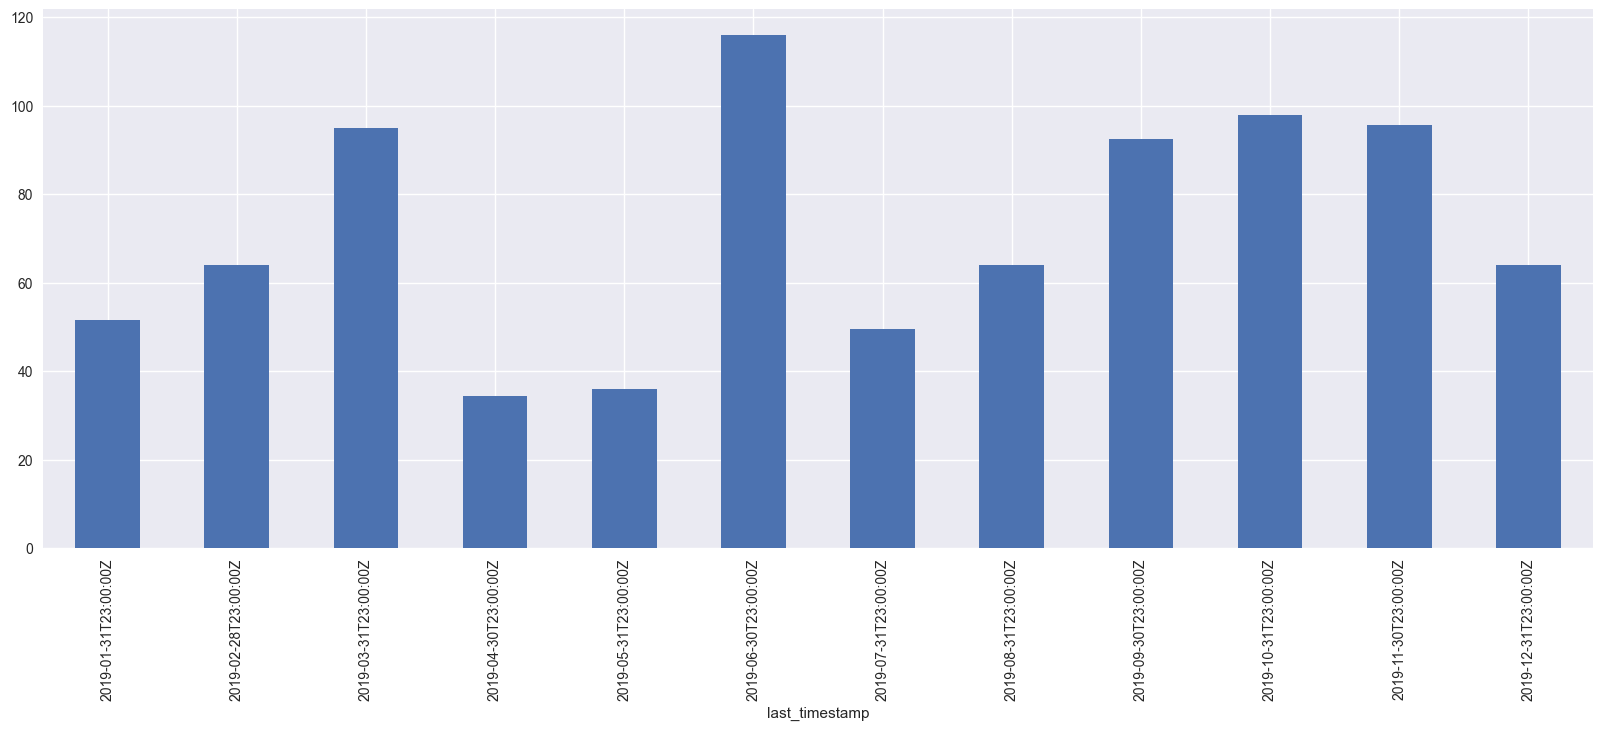

In [161]:
# Convert the data to a plot.
plt.style.use('seaborn')
timeseries_averaged_by_month.set_index('last_timestamp', inplace=True)
timeseries_averaged_by_month['sum'].plot.bar(figsize=(20,7))

# Note that these plots can be edited in style with the use of all matplotlib styling tools.

### How to query the maximum value of a time series for each year? 

In [162]:
# We want data between 2015 and 2020. We want the max, first and last timestamp. We want to aggregate it yearly. We want all data on one page.
params= {'start':'...', 'end':'...', 'fields':'...', 'window':'...', 'page_size':'...'} # we want the original hourly value

#Retrieve the 'results' attribute using a JSON interpreter
timeseries_max_value_each_month = pd.DataFrame(requests.get(url=url,headers=json_headers, params=params).json()['results'])

timeseries_max_value_each_month

max       first_timestamp        last_timestamp         max_timestamp
0   9.8  2015-01-01T00:00:00Z  2015-12-31T23:00:00Z  2015-08-26T20:00:00Z
1  33.3  2016-01-01T00:00:00Z  2016-12-31T23:00:00Z  2016-06-23T02:00:00Z
2   9.5  2017-01-01T00:00:00Z  2017-12-31T23:00:00Z  2017-12-31T19:00:00Z
3   9.2  2018-01-01T00:00:00Z  2018-12-31T23:00:00Z  2018-05-29T15:00:00Z
4  24.7  2019-01-01T00:00:00Z  2019-12-31T23:00:00Z  2019-06-19T17:00:00Z

C:\Users\steven.hosper\AppData\Local\Temp\ipykernel_8032\2070945811.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<Axes: xlabel='last_timestamp'>

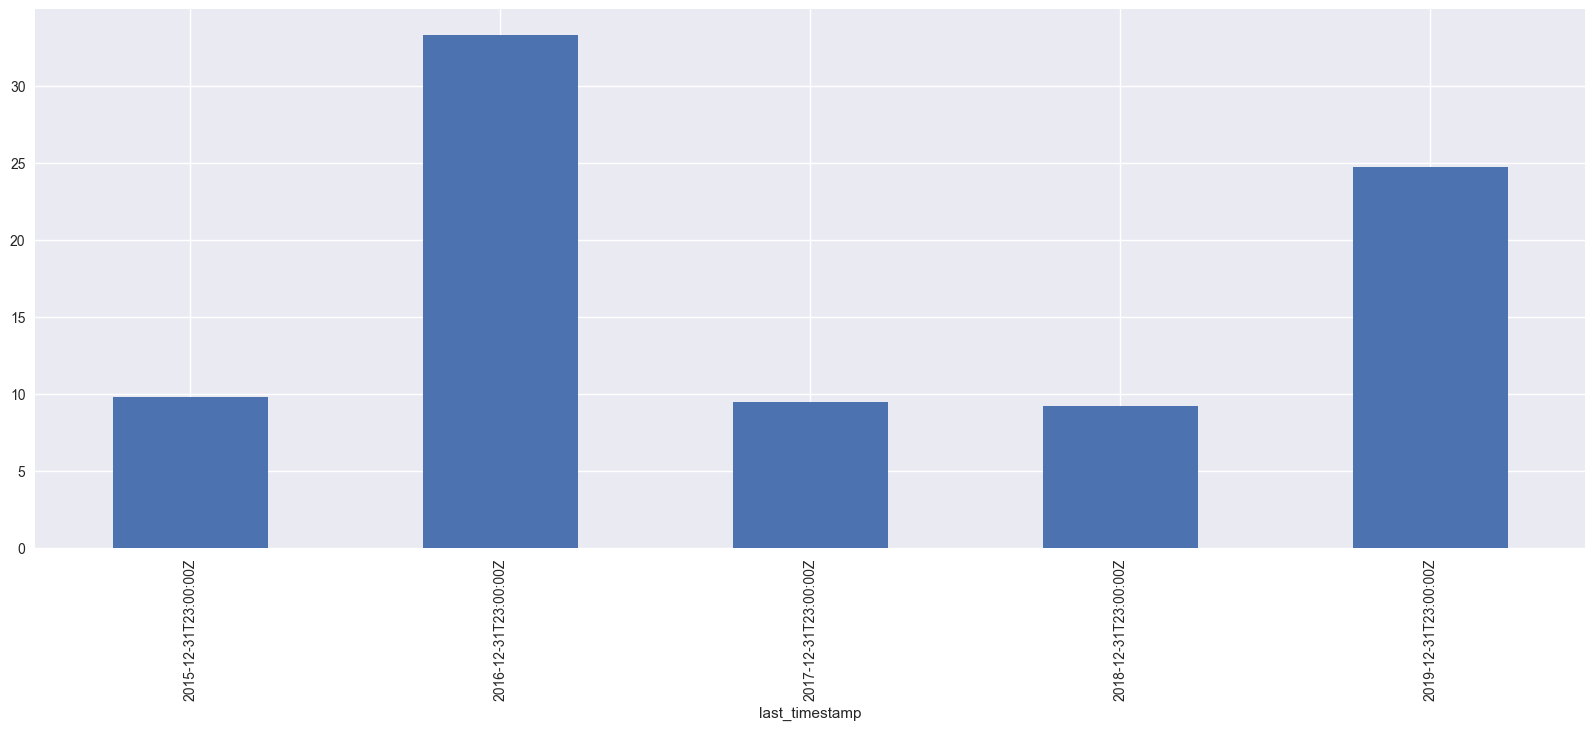

In [163]:
# Convert the data to a plot.
plt.style.use('seaborn')
timeseries_max_value_each_month.set_index('last_timestamp', inplace=True)
timeseries_max_value_each_month['max'].plot.bar(figsize=(20,7))

# Note that these plots can be edited in style with the use of all matplotlib styling tools.

### How to query the count of values per week within a specific time frame? 


In [164]:
# We want only the year 2019. We want the fields count, first and last timestamp. We want to aggregate it by the week. And we want all results on one page.
params= {'start':'...', 'end':'...', 'fields':'...', 'window':'...', 'page_size':'...'} # we want the original hourly value

#Retrieve the 'results' attribute using a JSON interpreter
timeseries_count_of_values_in_time_frame = pd.DataFrame(requests.get(url=url,headers=json_headers, params=params).json()['results'])

# Show the results
timeseries_count_of_values_in_time_frame

# In this case all counts except the start and finish are different (24 hours * 7 days = 168, meaning every hour an event (or data entry) can be found)

count       first_timestamp        last_timestamp
0     144  2019-01-01T00:00:00Z  2019-01-06T23:00:00Z
1     168  2019-01-07T00:00:00Z  2019-01-13T23:00:00Z
2     168  2019-01-14T00:00:00Z  2019-01-20T23:00:00Z
3     168  2019-01-21T00:00:00Z  2019-01-27T23:00:00Z
4     168  2019-01-28T00:00:00Z  2019-02-03T23:00:00Z
5     168  2019-02-04T00:00:00Z  2019-02-10T23:00:00Z
6     168  2019-02-11T00:00:00Z  2019-02-17T23:00:00Z
7     168  2019-02-18T00:00:00Z  2019-02-24T23:00:00Z
8     168  2019-02-25T00:00:00Z  2019-03-03T23:00:00Z
9     168  2019-03-04T00:00:00Z  2019-03-10T23:00:00Z
10    168  2019-03-11T00:00:00Z  2019-03-17T23:00:00Z
11    168  2019-03-18T00:00:00Z  2019-03-24T23:00:00Z
12    168  2019-03-25T00:00:00Z  2019-03-31T23:00:00Z
13    168  2019-04-01T00:00:00Z  2019-04-07T23:00:00Z
14    168  2019-04-08T00:00:00Z  2019-04-14T23:00:00Z
15    168  2019-04-15T00:00:00Z  2019-04-21T23:00:00Z
16    168  2019-04-22T00:00:00Z  2019-04-28T23:00:00Z
17    168  2019-04-29T00:00:00Z  2019-05-05T23:00:00Z
18    168  2019-05-06T00:00:00Z  2019-05-12T23:00:00Z
19    168  2019-05-13T00:00:00Z  2019-05-19T23:00:00Z
20    168  2019-05-20T00:00:00Z  2019-05-26T23:00:00Z
21    168  2019-05-27T00:00:00Z  2019-06-02T23:00:00Z
22    168  2019-06-03T00:00:00Z  2019-06-09T23:00:00Z
23    168  2019-06-10T00:00:00Z  2019-06-16T23:00:00Z
24    168  2019-06-17T00:00:00Z  2019-06-23T23:00:00Z
25    168  2019-06-24T00:00:00Z  2019-06-30T23:00:00Z
26    168  2019-07-01T00:00:00Z  2019-07-07T23:00:00Z
27    168  2019-07-08T00:00:00Z  2019-07-14T23:00:00Z
28    168  2019-07-15T00:00:00Z  2019-07-21T23:00:00Z
29    168  2019-07-22T00:00:00Z  2019-07-28T23:00:00Z
30    168  2019-07-29T00:00:00Z  2019-08-04T23:00:00Z
31    168  2019-08-05T00:00:00Z  2019-08-11T23:00:00Z
32    168  2019-08-12T00:00:00Z  2019-08-18T23:00:00Z
33    168  2019-08-19T00:00:00Z  2019-08-25T23:00:00Z
34    168  2019-08-26T00:00:00Z  2019-09-01T23:00:00Z
35    168  2019-09-02T00:00:00Z  2019-09-08T23:00:00Z
36    168  2019-09-09T00:00:00Z  2019-09-15T23:00:00Z
37    168  2019-09-16T00:00:00Z  2019-09-22T23:00:00Z
38    168  2019-09-23T00:00:00Z  2019-09-29T23:00:00Z
39    168  2019-09-30T00:00:00Z  2019-10-06T23:00:00Z
40    168  2019-10-07T00:00:00Z  2019-10-13T23:00:00Z
41    168  2019-10-14T00:00:00Z  2019-10-20T23:00:00Z
42    168  2019-10-21T00:00:00Z  2019-10-27T23:00:00Z
43    168  2019-10-28T00:00:00Z  2019-11-03T23:00:00Z
44    168  2019-11-04T00:00:00Z  2019-11-10T23:00:00Z
45    168  2019-11-11T00:00:00Z  2019-11-17T23:00:00Z
46    168  2019-11-18T00:00:00Z  2019-11-24T23:00:00Z
47    168  2019-11-25T00:00:00Z  2019-12-01T23:00:00Z
48    168  2019-12-02T00:00:00Z  2019-12-08T23:00:00Z
49    168  2019-12-09T00:00:00Z  2019-12-15T23:00:00Z
50    168  2019-12-16T00:00:00Z  2019-12-22T23:00:00Z
51    168  2019-12-23T00:00:00Z  2019-12-29T23:00:00Z
52     48  2019-12-30T00:00:00Z  2019-12-31T23:00:00Z

-------------------------------------------------------------------------------------------------------------------------------

## 10. How to query percentiles of time series events?


### Time series percentiles endpoint
Lizard enables you to query percentiles of your time series events via the `percentiles` endpoint. <br>
Again you will need the UUID of the time series object to query percentiles, template: **demo.lizard.net/api/v4/timeseries/*{uuid of time series object}*/percentiles/**

##### Example: 
https://demo.lizard.net/api/v4/timeseries/e849123b-19eb-43a4-ae16-f3cb05a9dea7/percentiles/


#### Available query parameters:

* The start date of the period of interest<br>
`?start=2016-06-21T06:05:00Z`

* The end date of the period of interest<br>
`?end=2017-06-21T06:05:00Z`

* The percentile of interest<br>
`?percentiles=25,50,75`

In [174]:
# For the De Bilt weatherstation a large part of the dataset will be zero (no rain), therefore it can be more interesting to look into the extremes (1 and 99 percentiles)
uuid = "8c3bffcf-b0b7-4550-a5a9-c5220c29fede"

params= {'start':'2019-01-01T00:00:00Z', 'end':'2020-01-01T00:00:00Z', 'percentiles':'..., ..., ...'} # Set the percentiles

url = "https://nens.lizard.net/api/v4/timeseries/{}/percentiles/".format(uuid) #we use page size to include all values

#Retrieve the 'results' attribute using a JSON interpreter
timeseries_percentiles_of_values_in_time_frame = pd.DataFrame(requests.get(url=url,headers=json_headers, params=params).json()['results'])

timeseries_percentiles_of_values_in_time_frame

0      1
0   1  1.553
1  50  1.669
2  99  1.758

In [173]:
# For the waterheight measured at het Katteveldse Meer its quite different.
uuid = "e849123b-19eb-43a4-ae16-f3cb05a9dea7"

params= {'start':'2019-01-01T00:00:00Z', 'end':'2020-01-01T00:00:00Z', 'percentiles':'..., ..., ...'} # Set the percentiles

url = "https://nens.lizard.net/api/v4/timeseries/{}/percentiles/".format(uuid) #we use page size to include all values

#Retrieve the 'results' attribute using a JSON interpreter
timeseries_percentiles_of_values_in_time_frame = pd.DataFrame(requests.get(url=url,headers=json_headers, params=params).json()['results'])

timeseries_percentiles_of_values_in_time_frame

0      1
0  25  1.590
1  50  1.669
2  75  1.690